In [1]:
import keras
import numpy as np
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import imdb

In [3]:
"""
把所有影評出現的英文單字化為對應之編號。
所有影評出現的英文單字依出現頻率排序，num_words=10000即取出現頻率前10000的英文單字，假如影評出現fawn這個單字，但其
編號為30000，則超出10000的單字會輸出2。
分類結果只有(0差評，1好評)。
每一篇影評開頭一定是1。
"""
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Terry\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Terry\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [4]:
#所有英文字母的編號對應dictionary
word_index = imdb.get_word_index()
#dict.items()可回傳(key,value)
inverse_word_index=dict([(keys,value) for (value,keys) in word_index.items()])
#dict.get(key, 'HHHH') 如果該key不存在，用'HHHH'取代
#該dict單字編號從3開始，012有其他用途
comment_show=np.array([inverse_word_index.get(i-3,'?') for i in train_data[0]])
comment_show

array(['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting',
       'location', 'scenery', 'story', 'direction', "everyone's",
       'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you',
       'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is',
       'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being',
       'director', '?', 'father', 'came', 'from', 'the', 'same',
       'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the',
       'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this',
       'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film',
       'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much',
       'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it',
       'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it',
       'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing',
       'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it',
       '

In [5]:
#將25000筆train_data拆成15000做訓練，10000做validation
print(train_data.shape,test_data.shape)
x_val=train_data[15000:]
x_partial_train=train_data[:15000]
train_labels=np.array(train_labels, dtype = float)
test_labels=np.array(test_labels, dtype = float)
y_val=train_labels[15000:]
y_partial_train=train_labels[:15000]
print(x_val.shape,x_partial_train.shape,y_val.shape,y_partial_train.shape)

(25000,) (25000,)
(10000,) (15000,) (10000,) (15000,)


In [6]:
#由於總共有10000種單字(其實應該是10000-3)，因此將資料化為一個二維矩陣，(samples個數,幾種單字)，讓每筆資料都能有相同長度
#如果該單字在影評中出現，該單字編號對應的位置由0變1
#不考慮重複出現之單字，因為分類結果只有(0壞，1好)影評
def vectorize_sequences(comments, dimension=10000):
    results = np.zeros((len(comments), dimension))
    #enumerate，像dict.items()一樣，一次回傳(位置,值)
    for i,sequence in enumerate(comments):
        results[i,sequence]=1.
    return results
vectorize_sequences(x_partial_train[:3], dimension=10000)

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [7]:
x_partial_train = vectorize_sequences(x_partial_train)
x_val=vectorize_sequences(x_val)
x_test = vectorize_sequences(test_data)
x_train=vectorize_sequences(train_data)
print(x_partial_train.shape,x_val.shape,x_test.shape)

(15000, 10000) (10000, 10000) (25000, 10000)


In [8]:
from keras import models
from keras import layers
# input_shape=(10000,)，去掉smaples的維度
# models.Sequential()純粹一層接一層連接在一起
# relu: f(x)=0 if x<0, f(x)=x if x>=0
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5325 - accuracy: 0.7703 - val_loss: 0.4153 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3288 - accuracy: 0.8968 - val_loss: 0.3162 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2400 - accuracy: 0.9266 - val_loss: 0.2858 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1904 - accuracy: 0.9414 - val_loss: 0.2736 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1539 - accuracy: 0.9514 - val_loss: 0.2795 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1289 - accuracy: 0.9599 - val_loss: 0.2886 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1048 - accuracy: 0.9682 - val_loss: 0.3024 - val_accuracy: 0.8868
Epoch 8/20
30

In [11]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

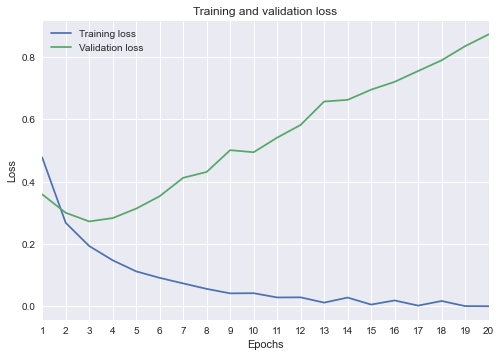

In [21]:
#將各個epoch的training data,validation data的適配結果顯現出來
#可以看到epoch=4之後有overfitting的問題
#因此epoch應該等於4即可
def plot_Training_validation_loss(history_dict,title):
    epoch=np.arange(1,len(history_dict['loss'])+1)
    plt.plot(epoch, history_dict['loss'], '-', label='Training loss')
    plt.plot(epoch, history_dict['val_loss'], '-', label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    x_major_locator=plt.MultipleLocator(1)
    plt.gca().xaxis.set_major_locator(x_major_locator)
    plt.xlim(1,len(epoch))
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_Training_validation_loss(history_dict,'Training and validation loss')

In [16]:
#用全部的training data訓練參數
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,np.array(train_labels), epochs=4, batch_size=512)
results = model.evaluate(x_test,np.array(test_labels))

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.4596 - accuracy: 0.8156
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2652 - accuracy: 0.9082
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2023 - accuracy: 0.9280 0s - loss: 0.2037 - accuracy
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8835


In [18]:
results

[0.29406026005744934, 0.8834800124168396]

In [40]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_partial_train,
                    y_partial_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history


Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5830 - accuracy: 0.7009 - val_loss: 0.4476 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3605 - accuracy: 0.8924 - val_loss: 0.3336 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2532 - accuracy: 0.9243 - val_loss: 0.3110 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1916 - accuracy: 0.9424 - val_loss: 0.2816 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1544 - accuracy: 0.9515 - val_loss: 0.2837 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1250 - accuracy: 0.9625 - val_loss: 0.2995 - val_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1039 - accuracy: 0.9698 - val_loss: 0.3545 - val_accuracy: 0.8747
Epoch 8/20
30

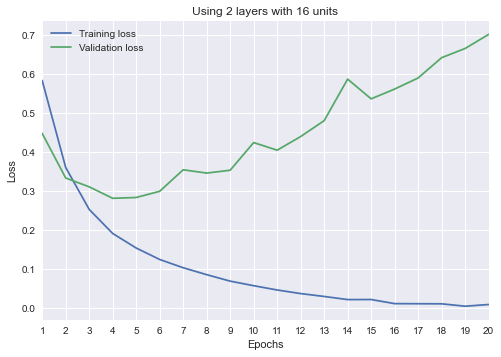

In [41]:
plot_Training_validation_loss(history_dict,'Using 2 layers with 16 units')